In [1]:
import pandas as pd
import numpy as np
import sys
import os
import pickle

from scipy.interpolate import interp1d
import random
import math
import xlrd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import copy


import math
import pydot
import io
from IPython.display import Image # Pour afficher une image dans le notebook
from os import system # Pour faire référence à l'OS windos et au prgramme existant sur le PC (ex: graphviz)
import graphviz
# Machine Learning packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
def setNameColums(data, NameFeature):
    numCol = len(data.columns)
    
    namFeatureData = []
    for i in range(numCol):
        namFeatureData.append(NameFeature + str(i+1))
    data.columns = namFeatureData
    return data
    
    

In [4]:
cheminProjet = os.getcwd()
cheminDonnes = os.path.join(cheminProjet, 'donnees')
donnees = os.listdir(cheminDonnes)

for i in donnees:
    print(i)
    chemin = os.path.join(cheminDonnes, i)
    print(os.listdir(chemin))
    print(chemin)
    
    
    # Récuprer les chemins de nos fichiers excel !!!!!
    liendonnesepuisement = os.path.join(chemin, 'epuisementAidants.xlsx')
    liendonnesHads = os.path.join(chemin, 'HADS_Aidants.xlsx')
    lienWHOQOL = os.path.join(chemin, 'WHOQOL_Aidants.xlsx')
    lienCRA = os.path.join(chemin, 'CRA_Aidants.xlsx')
    #--------------------------------------------------------------------
    #--------------------------------------------------------------------
    #--------------------------------------------------------------------
    
    
    dataEpuisement = pd.read_excel(liendonnesepuisement)
    dataHads = pd.read_excel(liendonnesHads)
    dataWHOWOL = pd.read_excel(lienWHOQOL)
    dataCRA = pd.read_excel(lienCRA)
    

    # Traurairement des variables d'épuisements
    dictEpuisement = {"p1" : {"Pas du tout" : 1, "Un peu" : 2, "Moderement" : 3, "Beaucoup" : 4, "Extremement" : 5}}
    dataEpuisement.replace(dictEpuisement, inplace=True)
    
    print('Pour le premier mois voila le tableau épuisement')
    #print(dataHads.head())

    dataEpuisement = dataEpuisement.set_index("ALIAS").copy()
    dataHads  = dataHads.set_index("ALIAS").copy()
    dataCRA = dataCRA.set_index("ALIAS").copy()
    dataWHOWOL = dataWHOWOL.set_index("ALIAS").copy()
    
        ## Trairement des noms de colonnes de metrics
    dataHads = setNameColums(dataHads, "Hads")
    dataWHOWOL = setNameColums(dataWHOWOL, "WHOWOQOL")
    dataCRA = setNameColums(dataCRA, "CRA")
    
    
    dataMois =pd.concat([dataHads, dataCRA, dataWHOWOL, dataEpuisement], axis=1)
    
    
    #### Sauver mes donnees dans des fichiers pickles
    nameFilepickle = 'data'+i+'.pickle'
    with open(nameFilepickle, 'wb') as fichier:
         mon_pickler = pickle.Pickler(fichier)
         mon_pickler.dump(dataMois)
    
    
    print(dataMois.head())
    print("------------Fin teration du " +i)
    #----------------------------------------------------------
    
    

mois1
['CRA_Aidants.xlsx', 'epuisementAidants.xlsx', 'HADS_Aidants.xlsx', 'WHOQOL_Aidants.xlsx']
C:\Users\oussama.batata\PycharmProjects\simulationWithBurnoutPrediction\EtudeSurJupyterNotebook\donnees\mois1
Pour le premier mois voila le tableau épuisement
           Hads1  Hads2  Hads3  Hads4  Hads5  Hads6  Hads7  Hads8  Hads9  \
AMANDINE     1.0    2.0    0.0    2.0    2.0    2.0    2.0    3.0    2.0   
ANISSA M.    2.0    2.0    1.0    2.0    2.0    1.0    3.0    2.0    2.0   
ANNIE B.     1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
ANNIE Bo.    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0   
ANNIE P.     3.0    3.0    3.0    2.0    3.0    2.0    3.0    3.0    2.0   

           Hads10 ...   WHOWOQOL18  WHOWOQOL19  WHOWOQOL20  WHOWOQOL21  \
AMANDINE      2.0 ...          3.0         4.0         2.0         2.0   
ANISSA M.     2.0 ...          4.0         3.0         2.0         2.0   
ANNIE B.      0.0 ...          NaN         NaN         NaN       

In [14]:
dictColums = dict()
iterat = 0
for i in dataMois.columns:
    if(iterat == len(dataMois.columns)-1):
        dictColums[i] = "burnout"
    else:
        dictColums[i] = "feature"+str(iterat+1)
    iterat+=1

In [26]:
import xlsxwriter
workbook = xlsxwriter.Workbook('test.xlsx')

worksheet = workbook.add_worksheet("dictColums")


colKey = 0
colVal = 1

row = 0
for key, valeur in dictColums.items():
    worksheet.write(row, colKey, key)
    worksheet.write(row, colVal, valeur)
    row+=1
workbook.close()

In [5]:
#charger les donnes du premier mois 
with open('datamois1.pickle', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    score_recupere = mon_depickler.load()
data = score_recupere
data.to_excel("outPut.xlsx")
dataFirstMonth = pd.read_excel("outPut.xlsx")
dataFirstMonth = dataFirstMonth.fillna(round(dataFirstMonth.mean()))
   
###################################################################################################
#charger les donnes du troisième mois 
with open('datamois3.pickle', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    score_recupere = mon_depickler.load()
data = score_recupere
data.to_excel("outPut.xlsx")
dataThirdMonth = pd.read_excel("outPut.xlsx")
dataThirdMonth = dataThirdMonth.fillna(round(dataThirdMonth.mean()))

######################################################################################################
#charger les donnes du cinquième mois 
with open('datamois5.pickle', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    score_recupere = mon_depickler.load()
data = score_recupere
data.to_excel("outPut.xlsx")
dataFiveMonth = pd.read_excel("outPut.xlsx")
dataFiveMonth = dataFiveMonth.fillna(round(dataFirstMonth.mean()))

# Bruitage des donneés

In [6]:
nbrCaregiverGeneres = 100
nbAidantsParPeriode = len(dataFirstMonth)

listeBruit = np.zeros((nbAidantsParPeriode, nbrCaregiverGeneres))
print("la shape de mon bruit est comme suit: " + str(listeBruit.shape))

la shape de mon bruit est comme suit: (31, 100)


In [7]:
def genererListeBruitage(nbAidantsParPeriode, nbrCaregiverGeneres):   
    listeBruit = np.zeros((nbAidantsParPeriode, nbrCaregiverGeneres))
    
    for i in range(nbAidantsParPeriode):## Boucler sur le nombre d'aidants de la population
        
        for j in range(nbrCaregiverGeneres):## Boucler sur le nombre d'aidants qu'on va générer artificiellement
            randParam = 0.7
            valRand = np.random.randint(0,10)/10
            if valRand > randParam:
                listeBruit[i][j] = random.gauss(mu=9/10,sigma=0.9)
            else:
                listeBruit[i][j] = random.gauss(mu=1/10,sigma=0.9)
                                                
                                                
    return listeBruit
            

In [8]:
def genererAidantsArtificiels(nbAidantsParPeriode, nbrCaregiverGeneres, listeBruit, dataMonth):
    #------------------------------------------
    indexDdataMonth = dataMois.index #### TRES TRES important, n'oubliant pas que nos dataMonth 
    #ont pour index les nom de personnes de ce fait il faut récupérer l'index numérique par la suite
    #------------------------------------------
    
    profilesAidantsArtificiels = pd.DataFrame(columns=dataMonth.columns)
    iterAidantArtf = 0
    for i in range(nbAidantsParPeriode):## Boucler sur le nombre d'aidants de la population
        
        for j in range(nbrCaregiverGeneres):## Boucler sur le nombre d'aidants qu'on va générer artificiellement
            profilesAidantsArtificiels.loc[iterAidantArtf] = round(dataMonth.loc[indexDdataMonth[i]]+random.gauss(mu=9/10,sigma=0.9))
            #print(profilesAidantsArtificiels.loc[iterAidantArtf])
            iterAidantArtf+=1

    return profilesAidantsArtificiels

In [9]:
def ajuterBruitageDonnes(data):
    for i in data.columns:
        data[i][data[i] > 5] = 2
        data[i][data[i] <= 1] = 1
    return data
    

In [10]:
listeBruit = genererListeBruitage(nbAidantsParPeriode, nbrCaregiverGeneres)
artfDataMois1 = genererAidantsArtificiels(nbAidantsParPeriode,nbrCaregiverGeneres,listeBruit, dataFirstMonth)
artfDataMois3 = genererAidantsArtificiels(nbAidantsParPeriode,nbrCaregiverGeneres,listeBruit, dataThirdMonth)
artfDataMois5 = genererAidantsArtificiels(nbAidantsParPeriode,nbrCaregiverGeneres,listeBruit, dataFiveMonth)

#### ajuster mes données bruitées !!

artfDataMois1 = ajuterBruitageDonnes(artfDataMois1)
artfDataMois3 = ajuterBruitageDonnes(artfDataMois3)
artfDataMois5 = ajuterBruitageDonnes(artfDataMois5)


# Interpolation des données

In [11]:
from scipy.interpolate import interp1d
timePeriode = [0, 30, 60]


## 1. Compacter les sequences des feautres sur des numpy listes

In [12]:
listeSequenceFeautres = []
vecFeautres = dict()
for i in range(len(artfDataMois1)):
    for i in artfDataMois1.columns:
        vecFeautres[i] = np.zeros(3)
    listeSequenceFeautres.append(vecFeautres.copy())

In [13]:
nbAidant, nbColumns = artfDataMois1.shape
colums = artfDataMois1.columns

for itAidant in range(len(artfDataMois1)):
    for itCol in range(nbColumns):
        #vectorFeatures[itAidant][itCol][0] = artfDataMois1.loc[itAidant, colums[itCol]]
        #vectorFeatures[itAidant][itCol][1] = artfDataMois3.loc[itAidant, colums[itCol]]
        #vectorFeatures[itAidant][itCol][2] = artfDataMois5.loc[itAidant, colums[itCol]]
        #print("before assignement" + str(listeSequenceFeautres[itAidant][artfDataMois1.columns[itCol]]))
        listeSequenceFeautres[itAidant][artfDataMois1.columns[itCol]][0] = artfDataMois1.loc[itAidant, colums[itCol]]
        listeSequenceFeautres[itAidant][artfDataMois1.columns[itCol]][1] = artfDataMois3.loc[itAidant, colums[itCol]]
        listeSequenceFeautres[itAidant][artfDataMois1.columns[itCol]][2] = artfDataMois5.loc[itAidant, colums[itCol]]
        #print("after assignement" + str(listeSequenceFeautres[itAidant][artfDataMois1.columns[itCol]]))
        if(colums[itCol] == "p1"):
            print("ma sequence est comme suit mois_first_ {}, mois_third {}, mois_five {}" .format(artfDataMois1.loc[itAidant, colums[itCol]], artfDataMois3.loc[itAidant, colums[itCol]], artfDataMois5.loc[itAidant, colums[itCol]]))
            print("mon résumé est " + str(listeSequenceFeautres[itAidant]["p1"]))
    print("fini les colonnes --------------------------")
        #print(artfDataMois3.loc[itAidant, colums[itCol]])
        #print(itCol)
      
    

ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 2.0
mon résumé est [4. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 4.0, mois_five 2.0
mon résumé est [3. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 2.0
mon résumé est [4. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 2.0
mon résumé est [4. 2. 2.]
fini les colonnes ------------

mon résumé est [2. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 5.0, mois_five 5.0
mon résumé est [2. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 4.0
mon résumé est [5. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 4.0
mon résumé est [5. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 4.0
mon résumé est [5. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 3.0
mon résumé est [5. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 3.0
mon résumé est [5. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0,

ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 2.0
mon résumé est [2. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 3.0
mon résumé est [2. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 4.0, mois_five 3.0
mon résumé est [3. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé est [5. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 3.0
mon résumé est [5. 5. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 3.0
mon résumé est [4. 3. 3.]
fini les colonnes ------------

fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 3.0
mon résumé est [4. 5. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 1.0
mon résumé est [5. 2. 1.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé est [5. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 3.0, mois_five 1.0
mon résumé est [3. 3. 1.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 2.0
mon résumé est [2. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 1.0, mois_five 2.0
mon résumé est [3. 1. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 3.0, mois_five 3.0
mon résumé 

mon résumé est [4. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 5.0, mois_five 2.0
mon résumé est [2. 5. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 5.0
mon résumé est [2. 4. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 4.0
mon résumé est [5. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 5.0, mois_five 5.0
mon résumé est [2. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 5.0
mon résumé est [2. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0,

ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 3.0
mon résumé est [5. 5. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 5.0
mon résumé est [5. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 4.0
mon résumé est [2. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 2.0
mon résumé est [4. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 5.0
mon résumé est [5. 4. 5.]
fini les colonnes ------------

mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 3.0
mon résumé est [5. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 4.0
mon résumé est [2. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 3.0
mon résumé est [5. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 4.0
mon résumé est [4. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 4.0
mon résumé est [5. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0,

ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 2.0
mon résumé est [2. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 2.0
mon résumé est [4. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 2.0, mois_five 5.0
mon résumé est [3. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 5.0
mon résumé est [4. 2. 5.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 4.0
mon résumé est [5. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 5.0
mon résumé est [4. 4. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 5.0
mon résumé est [4. 4. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 3.0
mon résumé est [5. 5. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 5.0
mon résumé est [4. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 4.0
mon résumé est [4. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes ------------

mon résumé est [4. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 5.0
mon résumé est [2. 3. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 4.0
mon résumé est [2. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 5.0
mon résumé est [2. 3. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 2.0
mon résumé est [2. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0,

ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 2.0
mon résumé est [5. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 5.0
mon résumé est [4. 3. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 1.0, mois_five 3.0
mon résumé est [2. 1. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 3.0
mon résumé est [5. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 3.0
mon résumé est [4. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 3.0
mon résumé est [5. 2. 3.]
fini les colonnes ------------

fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 3.0
mon résumé est [5. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé est [5. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 3.0
mon résumé est [2. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 3.0
mon résumé est [5. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 5.0
mon résumé est [4. 3. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 4.0
mon résumé est [4. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé 

ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 2.0
mon résumé est [2. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 2.0, mois_five 5.0
mon résumé est [1. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 1.0, mois_five 3.0
mon résumé est [2. 1. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 2.0, mois_five 3.0
mon résumé est [1. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 1.0, mois_five 4.0
mon résumé est [1. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 5.0
mon résumé est [2. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 2.0
mon résumé est [5. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 4.0, mois_five 4.0
mon résumé est [1. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 5.0
mon résumé est [4. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 5.0, mois_five 4.0
mon résumé est [5. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 5.0
mon résumé est [5. 4. 5.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 2.0, mois_third 5.0, mois_five 4.0
mon résumé est [2. 5. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 5.0
mon résumé est [4. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 4.0
mon résumé est [4. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 4.0
mon résumé est [4. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé est [5. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 3.0
mon résumé est [5. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 4.0
mon résumé est [5. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 4.0
mon résumé est [2. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 4.0
mon résumé est [2. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 5.0, mois_five 3.0
mon résumé est [2. 5. 3.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 4.0
mon résumé est [4. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 3.0, mois_five 4.0
mon résumé est [1. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 2.0
mon résumé est [4. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 3.0
mon résumé est [2. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 1.0, mois_five 2.0
mon résumé est [2. 1. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 2.0, mois_five 2.0
mon résumé est [3. 2. 2.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 4.0, mois_third 1.0, mois_five 4.0
mon résumé est [4. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 2.0, mois_five 4.0
mon résumé est [3. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 4.0
mon résumé est [4. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 2.0
mon résumé est [2. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 1.0, mois_five 4.0
mon résumé est [3. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 4.0
mon résumé est [2. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 4.0
mon résumé est [5. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 3.0
mon résumé est [4. 2. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 3.0, mois_five 4.0
mon résumé est [5. 3. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 4.0, mois_five 5.0
mon résumé est [3. 4. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 2.0
mon résumé est [5. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 1.0, mois_five 1.0
mon résumé est [2. 1. 1.]
fini les colonnes ------------

mon résumé est [5. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 2.0
mon résumé est [4. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 4.0, mois_five 2.0
mon résumé est [3. 4. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 2.0, mois_five 1.0
mon résumé est [3. 2. 1.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 1.0
mon résumé est [2. 2. 1.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 4.0
mon résumé est [4. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 1.0,

ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 4.0
mon résumé est [4. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 4.0
mon résumé est [4. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 4.0, mois_five 4.0
mon résumé est [4. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 3.0
mon résumé est [5. 4. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 3.0
mon résumé est [4. 5. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 5.0
mon résumé est [4. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 4.0, mois_five 4.0
mon résumé est [3. 4. 4.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 5.0
mon résumé est [4. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 4.0, mois_five 4.0
mon résumé est [5. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 5.0
mon résumé est [5. 2. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 5.0, mois_five 5.0
mon résumé est [4. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 2.0
mon résumé est [4. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 4.0, mois_five 4.0
mon résumé est [2. 4. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 3.0
mon résumé est [5. 2. 3.]
fini les colonnes ------------

ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 2.0
mon résumé est [4. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 2.0, mois_five 1.0
mon résumé est [5. 2. 1.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 3.0, mois_five 5.0
mon résumé est [3. 3. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 4.0
mon résumé est [4. 2. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 3.0
mon résumé est [4. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 3.0, mois_third 5.0, mois_five 5.0
mon résumé est [3. 5. 5.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 2.0, mois_five 2.0
mon résumé est [2. 2. 2.]
fini les colonnes ------------

fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 2.0, mois_third 3.0, mois_five 2.0
mon résumé est [2. 3. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 2.0, mois_five 2.0
mon résumé est [4. 2. 2.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 1.0, mois_third 3.0, mois_five 3.0
mon résumé est [1. 3. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 5.0, mois_third 1.0, mois_five 4.0
mon résumé est [5. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 1.0, mois_five 3.0
mon résumé est [4. 1. 3.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 1.0, mois_five 4.0
mon résumé est [4. 1. 4.]
fini les colonnes --------------------------
ma sequence est comme suit mois_first_ 4.0, mois_third 3.0, mois_five 3.0
mon résumé 

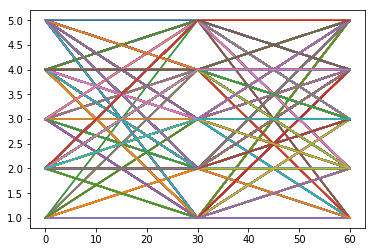

In [14]:

for i in listeSequenceFeautres:
    plt.plot(timePeriode, i["p1"])
plt.show()




In [15]:
for i in listeSequenceFeautres:
    print(i['p1'])

[4. 2. 2.]
[4. 3. 2.]
[3. 4. 2.]
[4. 4. 2.]
[2. 3. 2.]
[4. 3. 2.]
[4. 2. 2.]
[5. 3. 3.]
[4. 4. 3.]
[4. 1. 2.]
[4. 3. 2.]
[4. 3. 3.]
[5. 3. 2.]
[5. 3. 3.]
[4. 2. 2.]
[4. 3. 3.]
[4. 3. 5.]
[3. 4. 3.]
[5. 4. 4.]
[5. 3. 3.]
[4. 3. 3.]
[5. 4. 4.]
[3. 3. 3.]
[4. 1. 4.]
[4. 2. 2.]
[4. 4. 2.]
[4. 3. 2.]
[4. 3. 2.]
[4. 2. 3.]
[4. 4. 2.]
[4. 2. 4.]
[3. 4. 4.]
[5. 3. 2.]
[3. 3. 1.]
[4. 4. 2.]
[5. 2. 4.]
[4. 5. 5.]
[5. 4. 4.]
[3. 2. 4.]
[4. 5. 3.]
[5. 3. 3.]
[2. 3. 2.]
[3. 4. 2.]
[4. 3. 4.]
[4. 4. 2.]
[3. 3. 3.]
[3. 3. 2.]
[5. 2. 4.]
[3. 4. 2.]
[4. 2. 3.]
[4. 2. 3.]
[5. 3. 3.]
[3. 4. 3.]
[4. 2. 3.]
[4. 3. 4.]
[3. 4. 3.]
[4. 4. 2.]
[4. 2. 4.]
[3. 4. 3.]
[2. 3. 3.]
[3. 4. 2.]
[3. 2. 3.]
[4. 3. 2.]
[5. 3. 4.]
[3. 2. 3.]
[3. 4. 4.]
[2. 2. 4.]
[5. 4. 3.]
[4. 2. 4.]
[3. 3. 2.]
[4. 3. 3.]
[3. 3. 2.]
[3. 2. 3.]
[4. 3. 3.]
[5. 4. 3.]
[3. 4. 3.]
[5. 3. 3.]
[4. 2. 4.]
[3. 4. 2.]
[4. 2. 4.]
[4. 4. 4.]
[4. 3. 3.]
[4. 1. 4.]
[4. 3. 2.]
[3. 3. 3.]
[3. 2. 2.]
[3. 3. 3.]
[4. 2. 3.]
[4. 3. 2.]
[4. 2. 4.]
[5. 2. 2.]

[4. 2. 3.]
[5. 2. 2.]
[5. 2. 3.]
[4. 2. 1.]
[3. 3. 3.]
[5. 5. 5.]
[5. 3. 3.]
[3. 4. 4.]
[2. 3. 3.]
[4. 3. 4.]
[2. 1. 2.]
[5. 4. 3.]
[5. 3. 3.]
[4. 2. 1.]
[4. 1. 3.]
[2. 2. 3.]
[5. 2. 2.]
[2. 3. 3.]
[5. 3. 2.]
[2. 2. 5.]
[2. 4. 4.]
[4. 2. 2.]
[4. 3. 4.]
[5. 2. 4.]
[5. 2. 3.]
[5. 1. 3.]
[2. 3. 1.]
[5. 3. 2.]
[5. 3. 4.]
[5. 3. 2.]
[5. 3. 2.]
[2. 3. 2.]
[4. 3. 2.]
[2. 2. 2.]
[5. 3. 4.]
[5. 3. 4.]
[5. 4. 4.]
[5. 4. 3.]
[4. 4. 5.]
[2. 5. 5.]
[2. 5. 4.]
[3. 4. 4.]
[5. 2. 3.]
[5. 5. 5.]
[5. 4. 4.]
[4. 2. 4.]
[4. 5. 3.]
[4. 4. 2.]
[5. 4. 4.]
[5. 5. 2.]
[4. 5. 4.]
[5. 2. 3.]
[5. 5. 4.]
[3. 4. 3.]
[4. 5. 4.]
[2. 5. 3.]
[4. 3. 4.]
[5. 4. 4.]
[5. 4. 4.]
[5. 4. 4.]
[4. 3. 4.]
[5. 2. 5.]
[2. 4. 5.]
[3. 3. 3.]
[5. 3. 3.]
[5. 4. 3.]
[2. 3. 3.]
[5. 2. 3.]
[4. 3. 5.]
[4. 5. 4.]
[5. 4. 3.]
[2. 3. 4.]
[5. 4. 2.]
[4. 2. 2.]
[5. 4. 4.]
[4. 5. 4.]
[4. 5. 3.]
[2. 3. 5.]
[5. 2. 4.]
[5. 5. 5.]
[4. 3. 4.]
[4. 4. 4.]
[5. 4. 3.]
[4. 3. 4.]
[5. 4. 4.]
[5. 5. 4.]
[4. 5. 2.]
[5. 5. 4.]
[2. 4. 4.]
[2. 4. 2.]
[2. 3. 3.]

[3. 3. 4.]
[5. 2. 3.]
[3. 1. 3.]
[4. 1. 3.]
[5. 1. 2.]
[5. 2. 3.]
[4. 2. 3.]
[4. 1. 4.]
[4. 1. 3.]
[2. 3. 4.]
[3. 1. 3.]
[5. 2. 2.]
[2. 1. 3.]
[4. 2. 1.]
[3. 1. 4.]
[2. 3. 4.]
[5. 1. 3.]
[2. 5. 1.]
[5. 2. 3.]
[2. 1. 3.]
[3. 1. 2.]
[4. 2. 3.]
[4. 2. 2.]
[5. 1. 3.]
[4. 2. 4.]
[2. 2. 3.]
[4. 2. 3.]
[2. 2. 3.]
[4. 1. 3.]
[3. 2. 3.]
[3. 2. 3.]
[5. 3. 4.]
[3. 1. 3.]
[5. 1. 4.]
[5. 2. 2.]
[4. 2. 4.]
[1. 3. 4.]
[4. 2. 2.]
[2. 3. 3.]
[2. 1. 2.]
[3. 2. 2.]
[3. 3. 4.]
[5. 1. 3.]
[5. 1. 4.]
[4. 1. 3.]
[4. 1. 3.]
[5. 2. 3.]
[4. 3. 3.]
[5. 3. 4.]
[5. 2. 3.]
[4. 2. 4.]
[3. 1. 3.]
[4. 1. 2.]
[5. 1. 4.]
[3. 2. 3.]
[4. 1. 4.]
[4. 2. 2.]
[3. 3. 3.]
[4. 1. 3.]
[3. 1. 2.]
[4. 4. 5.]
[5. 3. 3.]
[3. 2. 4.]
[3. 3. 3.]
[4. 1. 4.]
[5. 1. 3.]
[4. 2. 3.]
[5. 2. 2.]
[4. 2. 3.]
[4. 3. 2.]
[5. 1. 1.]
[3. 1. 3.]
[5. 1. 3.]
[3. 2. 4.]
[5. 2. 1.]
[4. 2. 2.]
[3. 1. 3.]
[4. 1. 2.]
[5. 1. 4.]
[4. 2. 2.]
[4. 3. 3.]
[5. 2. 3.]
[4. 1. 3.]
[5. 2. 2.]
[4. 2. 3.]
[2. 3. 4.]
[5. 2. 3.]
[3. 3. 2.]
[4. 3. 4.]
[5. 3. 4.]
[3. 2. 2.]

## 2. Réaliser l'interpolation 

In [17]:
tnew = np.arange(60)
listeSequenceFeautresAfterInterpolation = []
vecFeautres = dict()
for i in range(len(artfDataMois1)):
    for i in artfDataMois1:
        vecFeautres[i] = np.zeros(60)
    listeSequenceFeautresAfterInterpolation.append(vecFeautres.copy())

for itAidant in range(len(listeSequenceFeautres)):
    for itCol in artfDataMois1.columns:
        #interpolate = interp1d(timePeriode, listeSequenceFeautres[itAidant][itCol], kind='quadratic')
        interpolate = interp1d(timePeriode, listeSequenceFeautres[itAidant][itCol])
        listeSequenceFeautresAfterInterpolation[itAidant][itCol] = np.round(interpolate(tnew))

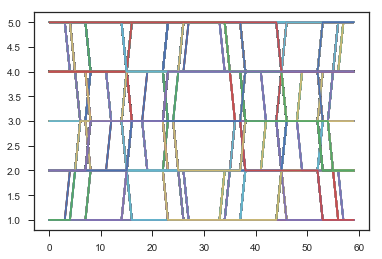

In [806]:
tnew = np.arange(60)
for i in listeSequenceFeautresAfterInterpolation:
    plt.plot(tnew, i["p1"])
plt.show()

In [834]:
kpi = np.zeros(60)
for itAidant in range(len(listeSequenceFeautresAfterInterpolation)):
    for it in range(60):
        if listeSequenceFeautresAfterInterpolation[itAidant]["p1"][it] >= 3:
            kpi[it] +=1

In [835]:
kpi

array([2090., 2090., 2090., 2090., 2090., 2090., 2268., 2268., 2436.,
       2436., 2436., 2436., 2442., 2442., 2442., 2237., 2428., 2428.,
       2428., 2395., 2395., 2395., 2395., 2229., 2229., 2029., 2029.,
       2029., 2029., 2029., 2029., 2029., 2029., 2029., 2029., 2029.,
       2177., 2177., 2362., 2362., 2362., 2362., 2405., 2405., 2405.,
       2228., 2472., 2472., 2472., 2461., 2461., 2461., 2461., 2358.,
       2358., 2268., 2268., 2268., 2268., 2268.])

# Evolution du burnout 

## 1. Binarization of target variable

In [810]:
listeFeaturesbinaires = copy.deepcopy(listeSequenceFeautresAfterInterpolation)
for itAidant in range(len(listeFeaturesbinaires)):
    s = np.where(listeFeaturesbinaires[itAidant]["p1"] > 3, 2,1)
    listeFeaturesbinaires[itAidant]["p1"]  = s.copy()

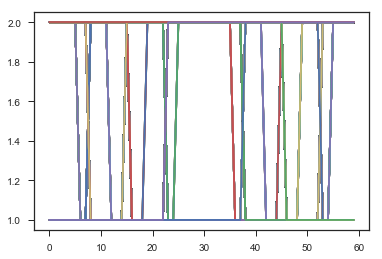

In [811]:
tnew = np.arange(60)
for i in listeFeaturesbinaires:
    plt.plot(tnew, i["p1"])
plt.show()

## 2. Génération des profils et de la matrice de Markov

In [812]:
#nbRow = len(listeSequenceFeautresAfterInterpolation)
#nbCol = len(listeSequenceFeautresAfterInterpolation[itAidant]["p1"])
caregiversBurnout = []
#np.zeros((nbRow,nbCol))

for itAidant in range(len(listeFeaturesbinaires)):
    burnoutAaidt = []
    for elt in (listeFeaturesbinaires[itAidant]["p1"]):
        burnoutAaidt.append(elt)
    caregiversBurnout.append(burnoutAaidt)

In [817]:
## fonction pour extraire les probas 

def ExtractMarkovMatrix (matrice):
    i = 0
    MarkovMatrix = []
    while i < len(matrice)-1:
        temp1 = []
        for j in range(2):
            occur = matrice[i].count(j+1)
            if(occur > 0): indices = [ind for ind, elt in enumerate(matrice[i]) if elt==j+1]  
            temp2 = [0,0]
            for k in range(2):
                if (occur > 0):
                        if([matrice[i+1][x] for x in indices].count(k+1) > 0): temp2[k] = [matrice[i+1][x] for x in indices].count(k+1)/occur
            temp1.append(temp2)
        MarkovMatrix.append(temp1)
        i+=1
    return MarkovMatrix


In [818]:
caregiversBurnouTrp = list(map(list, zip(*caregiversBurnout)))
matriceMarkov = ExtractMarkovMatrix(caregiversBurnouTrp)

## Générer les données d'apprentissage

In [847]:
dataFeaturesPatern = []
dataTargetPatern = []
for time in range(59):    
    dataFeatures =  np.zeros((len(listeFeaturesbinaires), len(artfDataMois1.columns)))
    dataTarget = np.zeros(len(listeFeaturesbinaires))
    for itAidant in range(len(listeFeaturesbinaires)):
        itCol = 0
        for col in artfDataMois1.columns:
            dataFeatures[itAidant][itCol] = listeFeaturesbinaires[itAidant][col][time]
            itCol+=1
        dataTarget[itAidant] = listeFeaturesbinaires[itAidant]["p1"][time+1]
    dataFeaturesPatern.append(dataFeatures)
    dataTargetPatern.append(dataTarget)